# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Payoff matrices for Player A and Player B
payoffs = {
    "A": np.array([[3, 0], [5, 1]]), 
    "B": np.array([[3, 5], [0, 1]])
}

In [3]:
# Q-tables for both players
Q_A = np.zeros((2, 1))  
Q_B = np.zeros((2, 1)) 

In [4]:
# Q-learning parameters
alpha = 0.3  # Learning rate
gamma_A = 0.9  # Discount factor of A
gamma_B = 0.9  # Discount factor of B
epsilon = 0.7  # Exploration rate
min_epsilon = 0.01  # Minimum exploration rate
decay_rate = 0.01  # Decay rate for epsilon

# Simulation parameters
episodes = 1000

# One-state

In [5]:
# Track simulations result regarding cooperation rates
track_cooperation = []  
coop_A_count = 0
coop_B_count = 0

decay_alert = 0

In [6]:
# Helper function for epsilon-greedy action selection
def choose_action(Q_column, epsilon):
    if np.random.rand() < epsilon:
        # Random action (exploration)
        return np.random.choice([0, 1])  # 0 = "C", 1 = "D"
    else:
        # Greedy action (exploitation)
        max_actions = np.flatnonzero(Q_column == Q_column.max())
        randomMaxAction = np.random.choice(max_actions)
        return randomMaxAction

In [7]:
# Epsilon decay function
def epsilon_decay(epsilon, min_epsilon, decay_rate, episode):
    return max(min_epsilon, epsilon * np.exp(-decay_rate * episode))


In [8]:
# Run Q-learning
for episode in range(1, episodes+1):
    # Decay epsilon
    epsilon = epsilon_decay(epsilon, min_epsilon, decay_rate, episode)

    if epsilon == 0.01 and decay_alert == 0:
        decay_alert += episode
        print("Stop decaying at episode n°", episode)
    
    # Choose actions
    action_A = choose_action(Q_A, epsilon)
    action_B = choose_action(Q_B, epsilon)

    # Count cooperation
    if action_A == 0:  
        coop_A_count += 1
    if action_B == 0:
        coop_B_count += 1
    
    # Get rewards
    reward_A = payoffs["A"][action_A, action_B]
    reward_B = payoffs["B"][action_A, action_B]
    
    
    # Update Q-tables
    Q_A[action_A] += alpha * (reward_A + gamma_A * np.max(Q_A) - Q_A[action_A])
    Q_B[action_B] += alpha * (reward_B + gamma_B * np.max(Q_B) - Q_B[action_B])

    
    # Track cooperation every 100 episodes
    if episode % 100 == 0:
        track_cooperation.append({
            "episode": episode,
            "cooperation_A": coop_A_count / 100,
            "cooperation_B": coop_B_count / 100
        })
        coop_A_count = 0
        coop_B_count = 0

Stop decaying at episode n° 29


In [9]:
# Convert cooperation tracking to DataFrame
track_cooperation_df = pd.DataFrame(track_cooperation)

In [10]:
# Print Q-tables
print("Q-Table for Player A:")
print(Q_A)
print("\nQ-Table for Player B:")
print(Q_B)

Q-Table for Player A:
[[ 8.89067352]
 [10.01173163]]

Q-Table for Player B:
[[ 9.23404542]
 [10.16610573]]


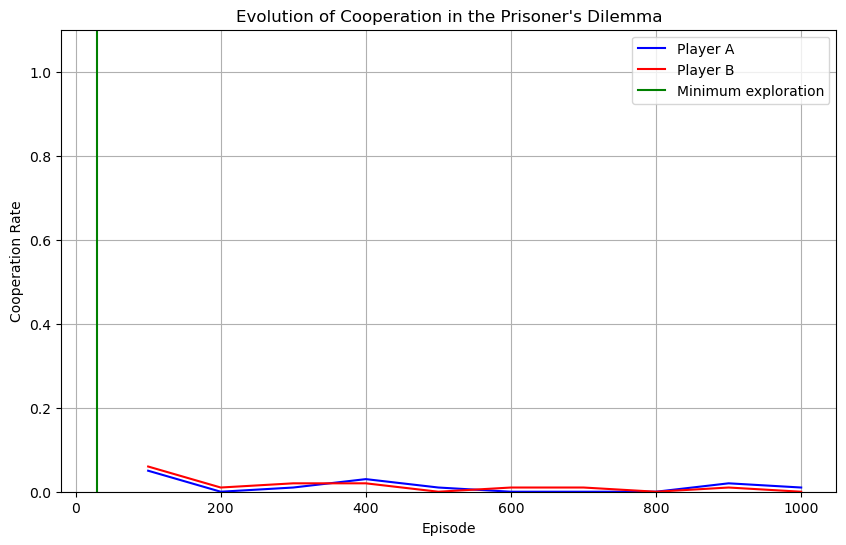

In [11]:
# Plot cooperation rates
plt.figure(figsize=(10, 6))
plt.ylim(0, 1.1)
plt.plot(track_cooperation_df["episode"], track_cooperation_df["cooperation_A"], label="Player A", color="blue")
plt.plot(track_cooperation_df["episode"], track_cooperation_df["cooperation_B"], label="Player B", color="red")
plt.axvline(x = decay_alert, color = 'g', label = 'Minimum exploration')
plt.title("Evolution of Cooperation in the Prisoner's Dilemma")
plt.xlabel("Episode")
plt.ylabel("Cooperation Rate")
plt.legend()
plt.grid(True)
plt.show()